# Holiday Package Prediciton

###  Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


### Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [66]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Feature Engineering

Data Cleaning

In [68]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [69]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [70]:
df['Gender'] = df['Gender'].str.replace("Fe Male",'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [71]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [72]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [73]:
# Checking missing values

features_wih_nan = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print('Missing Value Percentage---------------')
print()
for feature in features_wih_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'% Missing Values')

Missing Value Percentage---------------

Age 4.62357 % Missing Values
TypeofContact 0.51146 % Missing Values
DurationOfPitch 5.13502 % Missing Values
NumberOfFollowups 0.92062 % Missing Values
PreferredPropertyStar 0.53191 % Missing Values
NumberOfTrips 2.86416 % Missing Values
NumberOfChildrenVisiting 1.35025 % Missing Values
MonthlyIncome 4.76678 % Missing Values


In [74]:
# Statistical Info about Numerical Columns(NUll)
df[features_wih_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# Imputing Null Values:
1. For numerical cols : will use median
2. For categorical cols : will use mode

In [75]:
num_feature_with_na = df[features_wih_nan].select_dtypes(exclude='object').columns.to_list()
cat_feature_with_na = df[features_wih_nan].select_dtypes(include='object').columns.to_list()
print(features_wih_nan)
print(num_feature_with_na)
print(cat_feature_with_na)

['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
['TypeofContact']


In [76]:
for feature in num_feature_with_na:
    df[feature] = df[feature].fillna(df[feature].mean())

for feature in cat_feature_with_na:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [77]:
df.isnull().sum().sum()

0

In [78]:
df.drop('CustomerID', axis=1, inplace=True)

# Feature Extraction

In [79]:
# Creating a new Columns by Combining two...
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1, inplace=True)

In [80]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [81]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_feature))

Num of Numerical Features : 12


In [82]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_feature))

Num of Categorical Features : 6


In [83]:
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))

Num of Discrete Features : 9


In [84]:
continuous_features=[feature for feature in num_feature if feature not in discrete_feature]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [85]:
df.to_csv("Cleaned_travel.csv")

### EDA

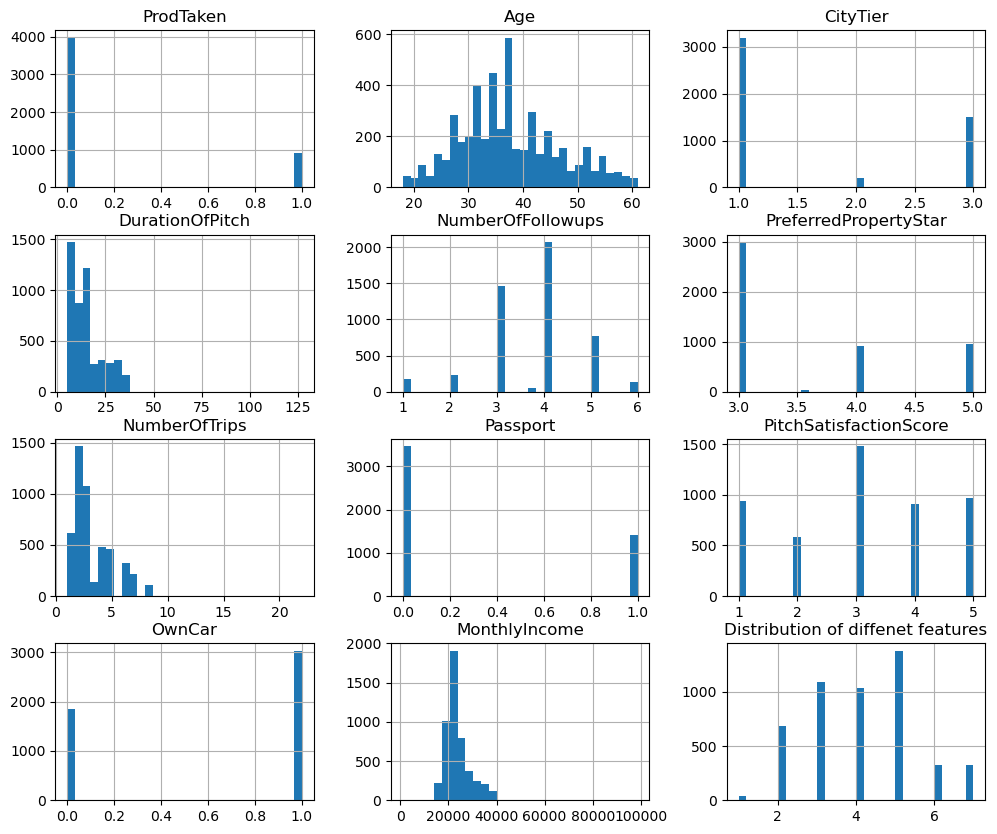

In [86]:
df.hist(bins=30, figsize=(12,10))
plt.title("Distribution of diffenet features")
plt.show()

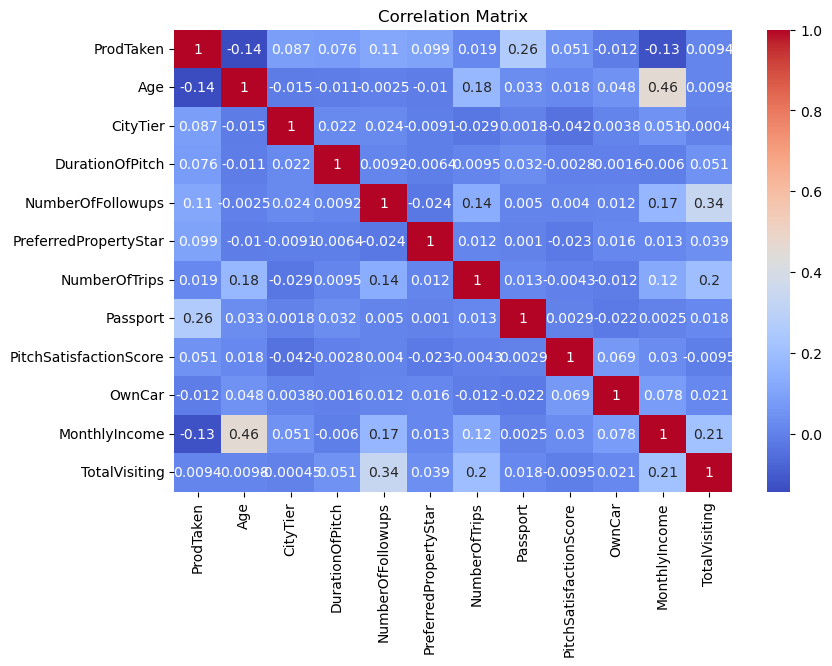

In [87]:
plt.figure(figsize=(9,6))
corr_matrix = df[num_feature].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

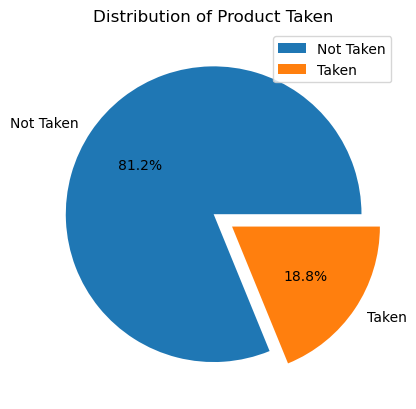

In [88]:
labels=['Not Taken','Taken']
explode = [0,0.15]
plt.pie(df['ProdTaken'].value_counts().values, labels=labels, autopct='%.1f%%', explode=explode)
plt.title("Distribution of Product Taken")
plt.legend()
plt.show()

### Train Test Split 

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [90]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

### Standard Scaling and Encoding

In [92]:
catFeatures = X.select_dtypes(include='object').columns
numFeatures = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer, catFeatures),
        ("StandardScaler",numeric_transformer,numFeatures)
    ]
)


In [93]:
X_train = preprocessor.fit_transform(X_train)

In [94]:
X_test = preprocessor.transform(X_test)

In [95]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.461225,1.258524,-0.709677,-0.732058,-0.112651,-0.63676,-0.047642,0.774491,0.003878,-1.476813
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.717379,0.421757,0.285734,1.770232,0.451521,-0.63676,-1.514426,0.774491,-0.089558,0.634321
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.461225,1.138986,0.285734,0.519087,-0.676822,1.57045,-0.781034,-1.291171,-1.170445,-1.476813
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.717379,-0.773624,0.285734,0.519087,1.579863,1.57045,0.685750,-1.291171,0.386086,0.634321
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.461225,2.334367,1.281145,1.770232,1.579863,1.57045,1.419141,-1.291171,1.122444,-0.069390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.717379,-0.773624,1.281145,0.519087,1.579863,-0.63676,-0.047642,-1.291171,-0.464170,0.634321
974,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.717379,1.856214,-0.709677,-0.732058,-0.112651,-0.63676,-0.047642,0.774491,0.006366,-1.476813
975,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.461225,0.002278,-0.709677,0.519087,1.579863,-0.63676,-0.047642,0.774491,0.003878,-0.773102
976,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.461225,-0.534548,0.285734,-0.732058,1.579863,-0.63676,0.685750,0.774491,-0.519226,-0.069390


### Model Training

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [97]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

In [98]:
for name, model in models.items():

    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8455
- F1 score: 0.8171
- Precision: 0.6890
- Recall: 0.2743
- Roc Auc Score: 0.6234
----------------------------------
Model performance for Test set
- Accuracy: 0.8323
- F1 score: 0.8017
- Precision: 0.7778
- Recall: 0.3014
- Roc Auc Score: 0.6390


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8978
- F1 score: 0.8964
- Precision: 0.7795
- Recall: 0.7273
- Roc Auc Score: 0.8357


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9202
- F1 score: 0.9135
- Precision: 0.9852
- Recall: 0.6364
- Roc Auc Score: 0.8169


Gradient Boost
Model performance for Training se

### Hyperparametr Tunning

In [99]:
rf_paras = {
    'max_depth' : [None, 5, 8, 10],
    'max_features' : ['auto',5,7],
    'min_samples_split' : [2,5,10,15],
    'n_estimators' : [50,100,200,300] 
}

In [100]:
randomcv_models = [
    ('RF', RandomForestClassifier(), rf_paras)
]

In [101]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [None, 5, 8, 10],
   'max_features': ['auto', 5, 7],
   'min_samples_split': [2, 5, 10, 15],
   'n_estimators': [50, 100, 200, 300]})]

In [102]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)

    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------------Best Params for {model_name}---------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------------Best Params for RF---------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [103]:
tunned_model = {
    "Random Forest" :  RandomForestClassifier(n_estimators=100, min_samples_split=2,max_features=7, max_depth=None)
}

In [104]:
for name, model in tunned_model.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9294
- F1 score: 0.9246
- Precision: 0.9795
- Recall: 0.6842
- Roc Auc Score: 0.8402




### Roc_Auc Curve

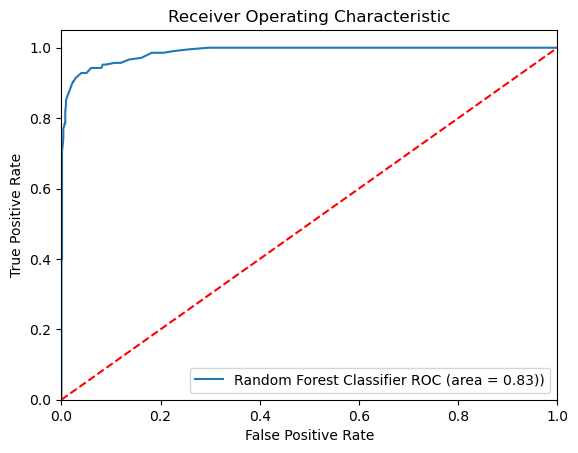

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

auc_models = [
    {
        'label' : 'Random Forest Classifier',
        'model' : RandomForestClassifier(n_estimators=100, min_samples_split=2,max_features=7, max_depth=None),
        'auc' : 0.8265
    }
]

for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f))' % (algo['label'],algo['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 